In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
##5.case Kutunun içerisinde gözlük.uygulamayı başlatarak ileri-geri hareketler dur-kalk ivmelendirmesi ve farklı yönlere gitme eylemleri

In [2]:
df = pd.read_csv('DistanceLogTest5.csv')



In [3]:
df.head()

,Time,ObjectX,ObjectY,ObjectZ,CameraX,CameraY,CameraZ,Distance,DeltaDistance,InitialDistance
0,2.86,0.0,1.5,1.5,0.0009,1.5000,0.0001,1.4999,0.0000,1.4999
1,2.96,0.0,1.5,1.5,0.0009,1.5000,0.0001,1.4999,0.0000,1.4999
2,3.07,0.0,1.5,1.5,0.0010,1.5000,0.0001,1.4999,0.0000,1.4999
3,3.19,0.0,1.5,1.5,0.0010,1.5000,0.0001,1.4999,0.0001,1.4999
4,3.29,0.0,1.5,1.5,0.0010,1.5001,0.0001,1.4999,0.0000,1.4999


In [4]:
df.describe()


,Time,ObjectX,ObjectY,ObjectZ,CameraX,CameraY,CameraZ,Distance,DeltaDistance,InitialDistance
count,459.000000,459.0,459.0,459.0,459.000000,458.000000,458.000000,458.000000,458.000000,4.580000e+02
mean,29.812048,0.0,1.5,1.5,-0.052359,1.601396,-0.205997,1.768792,0.268911,1.499900e+00
std,15.612360,0.0,0.0,0.0,0.436749,0.219111,0.172373,0.245900,0.245901,2.222874e-16
min,2.860000,0.0,1.5,1.5,-1.165100,1.441100,-0.609700,1.499300,-0.000600,1.499900e+00
25%,16.345000,0.0,1.5,1.5,-0.246200,1.499800,-0.342900,1.502550,0.002650,1.499900e+00
50%,29.840000,0.0,1.5,1.5,-0.029500,1.505100,-0.219100,1.842600,0.342700,1.499900e+00
75%,43.290000,0.0,1.5,1.5,0.000900,1.516300,-0.002225,1.910200,0.410300,1.499900e+00
max,56.940000,0.0,1.5,1.5,0.846100,2.067300,0.000700,2.475200,0.975300,1.499900e+00


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             459 non-null    float64
 1   ObjectX          459 non-null    float64
 2   ObjectY          459 non-null    float64
 3   ObjectZ          459 non-null    float64
 4   CameraX          459 non-null    float64
 5   CameraY          458 non-null    float64
 6   CameraZ          458 non-null    float64
 7   Distance         458 non-null    float64
 8   DeltaDistance    458 non-null    float64
 9   InitialDistance  458 non-null    float64
dtypes: float64(10)
memory usage: 36.0 KB


In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#Açıları hesapladıktan sonra tutulacak liste
angles = []

def angle_between(v1,v2):
    v1_norm = v1 / np.linalg.norm(v1)
    v2_norm = v2 / np.linalg.norm(v2)
    dot = np.dot(v1_norm, v2_norm)
    dot = np.clip(dot, -1.0, 1.0)  # Güvenli arccos için
    angle_rad = np.arccos(dot)
    return np.degrees(angle_rad)

for _, row in df.iterrows():
    v1 = np.array([row["ObjectX"], row["ObjectY"], row["ObjectZ"]])
    v2 = np.array([row["CameraX"], row["CameraY"], row["CameraZ"]])
    angle = angle_between(v1,v2)
    angles.append(angle)
df["AngleBetweenVectors"] = angles

In [8]:
df.to_csv("veri_with_angles.csv", index=False)#Yeni dosya 

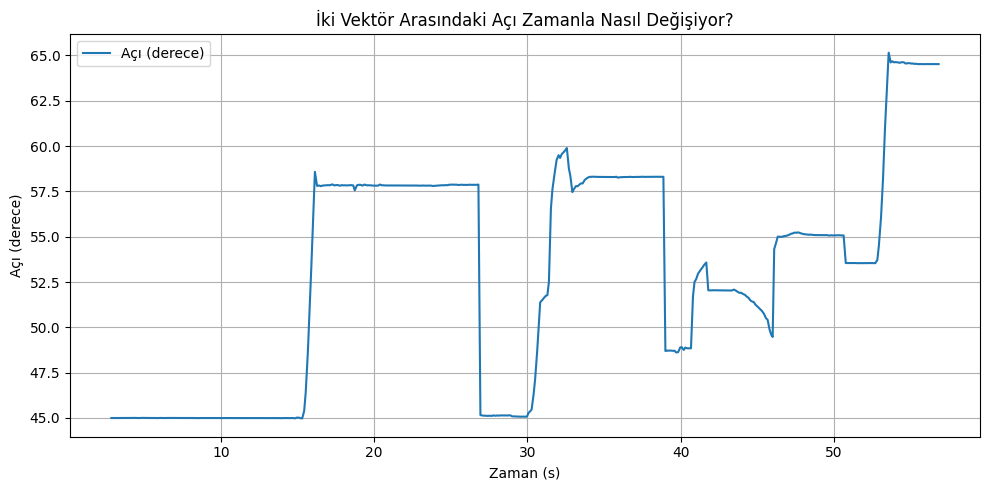

In [9]:
# Görselleştir
plt.figure(figsize=(10, 5))
plt.plot(df["Time"], df["AngleBetweenVectors"], label="Açı (derece)")
plt.xlabel("Zaman (s)")
plt.ylabel("Açı (derece)")
plt.title("İki Vektör Arasındaki Açı Zamanla Nasıl Değişiyor?")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

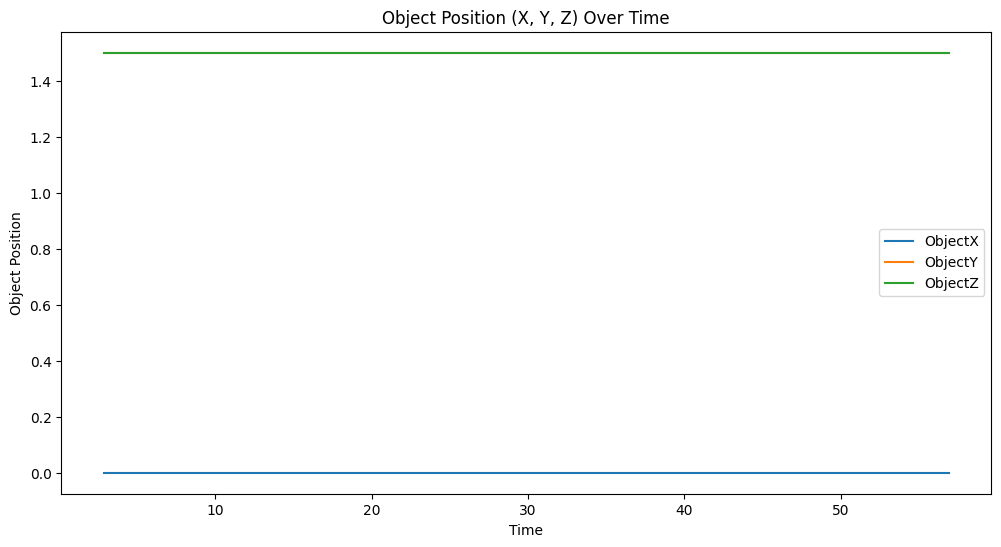

In [10]:
##OBJENİN KONUMU
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='ObjectX', data=df, label='ObjectX')
sns.lineplot(x='Time', y='ObjectY', data=df, label='ObjectY')
sns.lineplot(x='Time', y='ObjectZ', data=df, label='ObjectZ')
plt.xlabel('Time')
plt.ylabel('Object Position')
plt.title('Object Position (X, Y, Z) Over Time')
plt.legend()
plt.show()

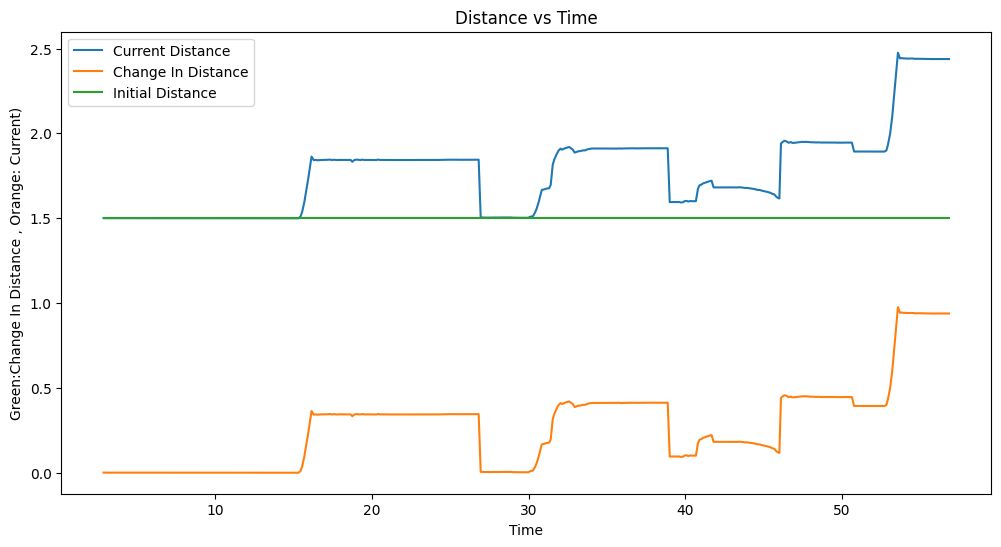

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Distance', data=df,label='Current Distance')
sns.lineplot(x='Time', y='DeltaDistance', data=df,label='Change In Distance')
sns.lineplot(x='Time', y='InitialDistance', data=df,label='Initial Distance')
plt.xlabel('Time')
plt.ylabel('Green:Change In Distance , Orange: Current)')
plt.title('Distance vs Time')
plt.legend()
plt.show()






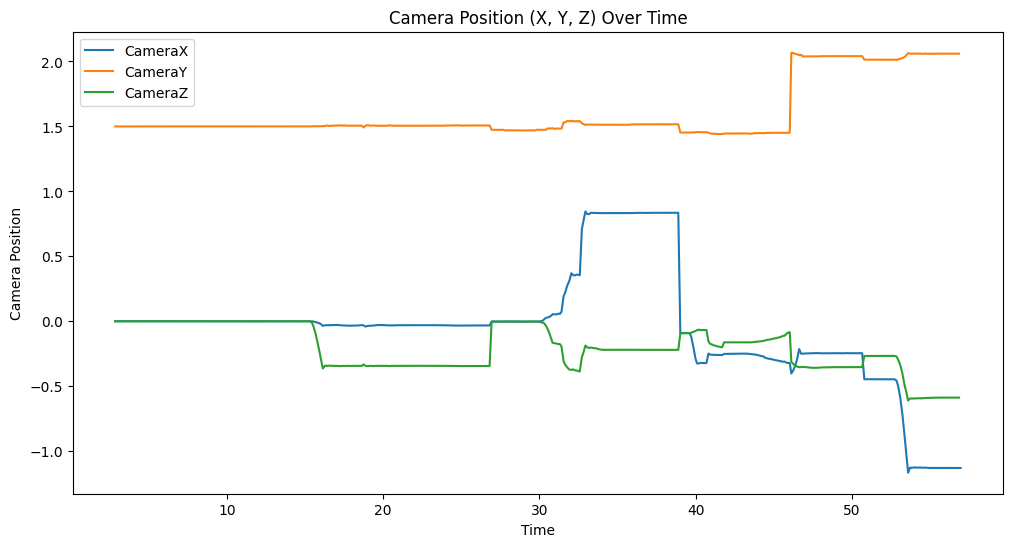

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='CameraX', data=df, label='CameraX')
sns.lineplot(x='Time', y='CameraY', data=df, label='CameraY')
sns.lineplot(x='Time', y='CameraZ', data=df, label='CameraZ')
plt.xlabel('Time')
plt.ylabel('Camera Position')
plt.title('Camera Position (X, Y, Z) Over Time')
plt.legend()
plt.show()

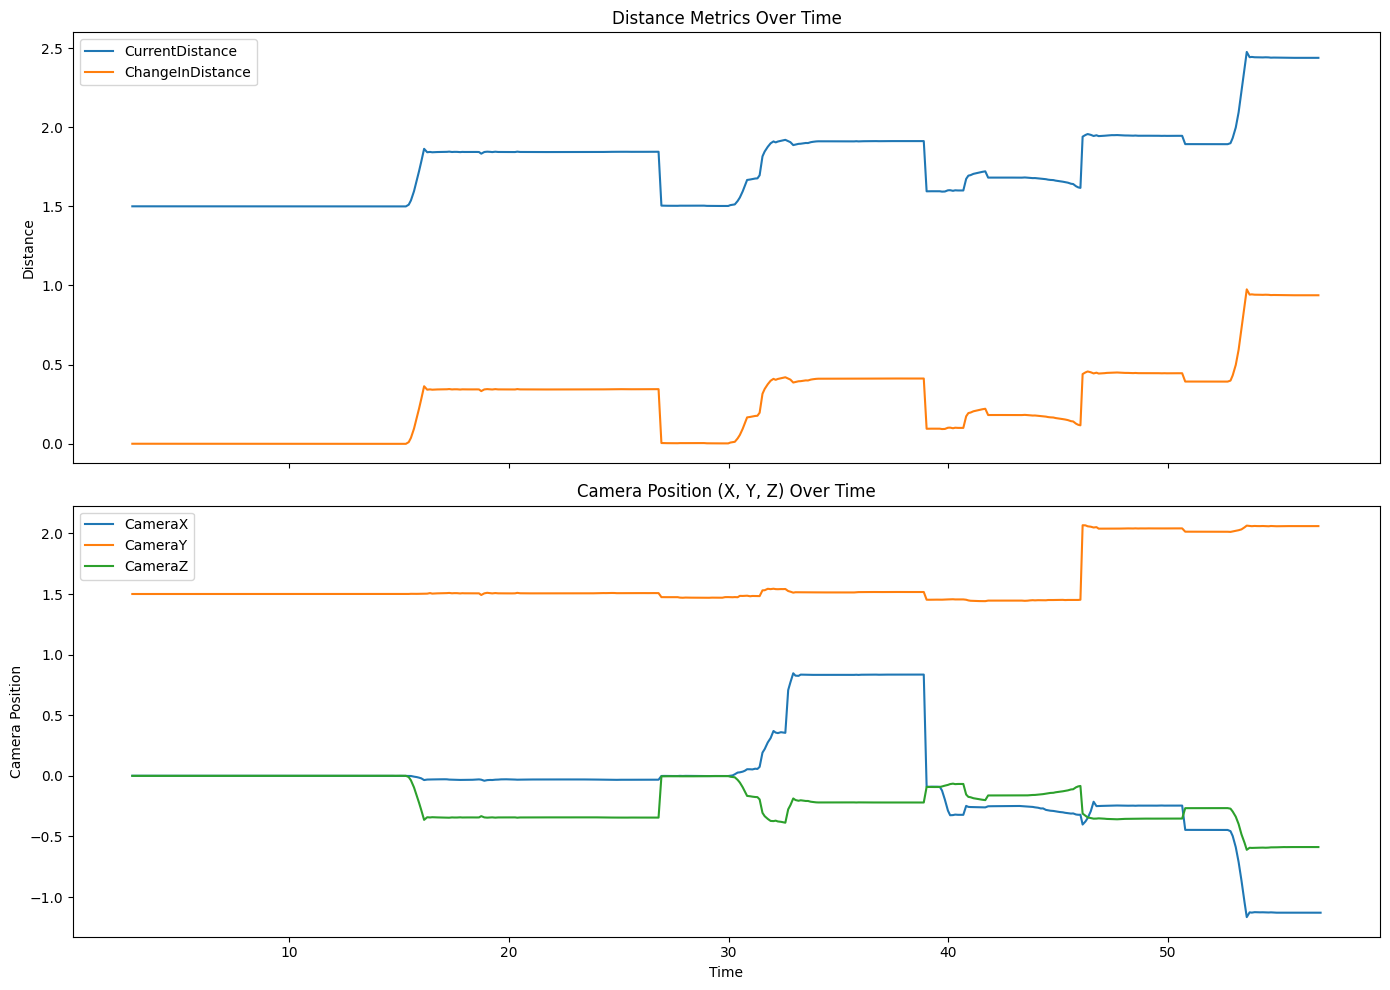

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# First plot: Distances

sns.lineplot(x='Time', y='Distance', data=df, label='CurrentDistance', ax=axs[0])
sns.lineplot(x='Time', y='DeltaDistance', data=df, label='ChangeInDistance', ax=axs[0])
axs[0].set_ylabel('Distance')
axs[0].set_title('Distance Metrics Over Time')
axs[0].legend()

# Second plot: Camera positions
sns.lineplot(x='Time', y='CameraX', data=df, label='CameraX', ax=axs[1])
sns.lineplot(x='Time', y='CameraY', data=df, label='CameraY', ax=axs[1])
sns.lineplot(x='Time', y='CameraZ', data=df, label='CameraZ', ax=axs[1])
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Camera Position')
axs[1].set_title('Camera Position (X, Y, Z) Over Time')
axs[1].legend()

plt.tight_layout()
plt.show()